### Necessary Libraries

In [139]:
from math import sqrt,exp
import numpy as np
import matplotlib.pyplot as plt
import random
import math

### IJK Scheme

In [140]:
def IJKScheme(M,N):
    r = 0
    K = 100
    T =1 
    dt = T/N
    row =0.36
    kappa = 2.58
    eta = 0.043
    v0 = 0.114
    s0 = 125
    sigma = 1
    
    c=[]

    for j in range(1,M):
        v =[]
        v.append(v0)
        s =[]
        s.append(s0)
        for i in range(1,N):
            x=random.gauss(0,1)
            y=random.gauss(0,1)
            randomTerm = row*x+sqrt(1-row**2)*y
            vtemp = max(v[i-1],0)
            firstTerm = kappa*eta*dt
            secondTerm = sigma*sqrt(vtemp*dt)*randomTerm
            thirdTerm = 0.25*sigma*sigma*dt*(randomTerm**2 -1)
            v.append((v[i-1]+firstTerm + secondTerm + thirdTerm)/(1+kappa*dt))
            sFirstTerm = (r - 0.25*(vtemp+max(v[i],0)))*dt
            sSecondTerm = row*sqrt(vtemp*dt)*randomTerm
            sThirdTerm = 0.5*(sqrt(max(v[i],0)) + sqrt(vtemp))*(x - row*randomTerm)*sqrt(dt)
            sFourthTerm = sigma*row*0.25*dt*(randomTerm**2 - 1)
            s.append(s[i-1] + sFirstTerm + sSecondTerm + sThirdTerm + sFourthTerm)
        
        c.append(math.exp(-r*T)*max(s[N-1]-K,0))
    
    price = (np.mean(c))
    error = (np.std(c)/math.sqrt(M))
    return price,error


In [141]:
IJKScheme(1500,260)

(24.962055157028306, 0.0064777972046876674)

### Milstein Scheme

In [142]:
def MilsteinScheme(M,N):
    r = 0
    K = 100
    T =1 
    dt = T/N
    row =0.36
    kappa = 2.58
    eta = 0.043
    v0 = 0.114
    s0 = 125
    sigma = 1

    c=[]

    for j in range(1,M):
        v=[]
        v.append(v0)
        s=[]
        s.append(s0)

        for i in range(1,N):
            x=random.gauss(0,1)
            y=random.gauss(0,1)
            randomTerm = row*x + math.sqrt(1-row**2)*y
            vtemp = max(0,v[i-1])
            firstTerm = kappa*(eta - vtemp*0.5)*dt
            thirdTerm = 0.25*(sigma**2)*dt*(randomTerm**2 - 1)
            secondTerm = sigma*((dt*vtemp)**0.5)*randomTerm
            v.append(v[i-1]+ firstTerm + secondTerm + thirdTerm)
            s.append(s[i-1] + math.sqrt(vtemp*dt)*x + (r-vtemp*0.5)*dt)
        
        c.append(math.exp(-r*T)*max(s[N-1]-K,0))
    
    price = np.mean(c)       
    error = np.std(c)/math.sqrt(M)
    return price,error

In [143]:
MilsteinScheme(1500,260)

(24.951681034919247, 0.0077042513651442218)

### Euler Scheme

In [144]:
def EulerScheme(M,N):
    r = 0
    K = 100
    T =1 
    dt = T/N
    row =0.36
    kappa = 2.58
    eta = 0.043
    v0 = 0.114
    s0 = 125
    sigma = 1
    
    c=[]

    for j in range(1,M):
        v =[]
        v.append(v0)
        s =[]
        s.append(s0)
        for i in range(1,N):
            x=random.gauss(0,1)
            y=random.gauss(0,1)
            firstTerm = kappa*(eta - max(0,v[i-1]))*(dt)
            secondTerm = sigma*(max(0,v[i-1]) *dt)**0.5
            randomTerm = row*x+math.sqrt(1-row**2)*y
            v.append(v[i-1] + firstTerm + (secondTerm * randomTerm))
            s.append(s[i-1] + math.sqrt(max(v[i-1],0)*dt)*x + (r - max(v[i-1],0)*0.5)*dt)
        
        c.append(math.exp(-r*T)*max(s[N-1]-K,0))
        
        
    price = np.mean(c)
    error = np.std(c)/math.sqrt(M)
    return price,error

In [145]:
EulerScheme(1500,260)[1]

0.0066697556997295376

### QE Simulation

In [146]:
def QEScheme(M,N):
    r = 0
    K = 100
    T =1 
    dt = T/N
    row =0.36
    kappa = 2.58
    eta = 0.043
    v0 = 0.114
    s0 = 125
    sigma = 1
    psic = 1.5
    z1 = 0.5
    z2 = 0.5
    
    c=[]

    for j in range(1,M):
        v =[]
        v.append(v0)
        s =[]
        s.append(s0)
        for i in range(1,N):
            x=random.gauss(0,1)
            y=random.uniform(0,1)
            z=random.gauss(0,1)
            expo = math.exp(-kappa*dt)
            randomTerm = row*x+sqrt(1-row**2)*y
            m = eta + (v[i-1] - eta)*expo
            ssq = (v[i-1]*sigma*sigma*expo*(1-expo)/kappa) + (eta*sigma*sigma*0.5/kappa*((1-expo)**2))
            psi = ssq/(m**2)
            if psi <= psic:
                bsq = max(2/psi -1 +2*math.sqrt(2/psi)*math.sqrt(2/psi - 1),0)
                a = m/(1+bsq)
                b = math.sqrt(bsq)
                v.append(a*(b + x)**2)
            else:
                p = (psi -1)/(psi+1)
                beta = max((1-p)/m,0)
                if y<p:
                    v.append(0)
                else:
                    v.append(math.log10((1-p)/(1-y))/beta)
                    
            k0 = -row*kappa*eta*dt/sigma
            k1 = z1*dt*(kappa*row/sigma - 0.5 ) - row/sigma
            k2 = z2*dt*(kappa*row/sigma - 0.5 ) + row/sigma
            k3 = z1*dt*(1-row**2)
            k4 = z2*dt*(1-row**2)
            s.append(s[i-1] + r*dt + k0 + k1*v[i-1]+ k2*v[i] + math.sqrt(k3*v[i-1]+k4*v[i])*z )
        
        c.append(math.exp(-r*T)*max(s[N-1]-K,0))
    
    price = (np.mean(c))
    error = (np.std(c)/math.sqrt(M))
    return price,error

In [147]:
QEScheme(1500,260)

(24.944862255248328, 0.0062066821704080269)

### Error Rate

In [26]:
import random
N = 260 # discretisation density
errorListIJK =[]
errorListMS = []
errorListES = []
errorListQE = []
index = []

for i in range(100,3001,100):
    index.append(i)
    errorListIJK.append(IJKScheme(i,N)[1])
    errorListMS.append(MilsteinScheme(i,N)[1])
    errorListES.append(EulerScheme(i,N)[1])
    errorListQE.append(QEScheme(i,N)[1])
    
    

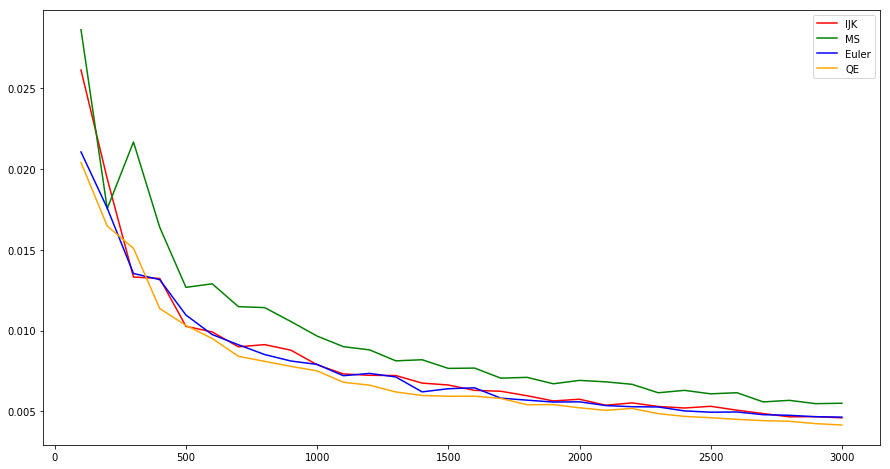

In [29]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,8)

xaxis = range(100,3001,100)
plt.plot(xaxis,errorListIJK,label="IJK",color = "red")
plt.plot(xaxis,errorListMS,label="MS", color = "green")
plt.plot(xaxis,errorListES,label="Euler",color = "blue")
plt.plot(xaxis,errorListQE,label="QE",color = "orange")
plt.legend()
plt.show()


In [30]:
print(min(errorListQE))
errorListIJK[24]

0.00415115338219


0.0053106284979023812

In [160]:
index =[]
errorListIJKm =[]
errorListMSm = []
errorListESm = []
errorListQEm = []
M  = 1000

for i in range(100,3001,100):
    index.append(i)
    errorListIJKm.append(IJKScheme(M,i)[1])
    errorListMSm.append(MilsteinScheme(M,i)[1])
    errorListESm.append(EulerScheme(M,i)[1])
    errorListQEm.append(QEScheme(M,i)[1])

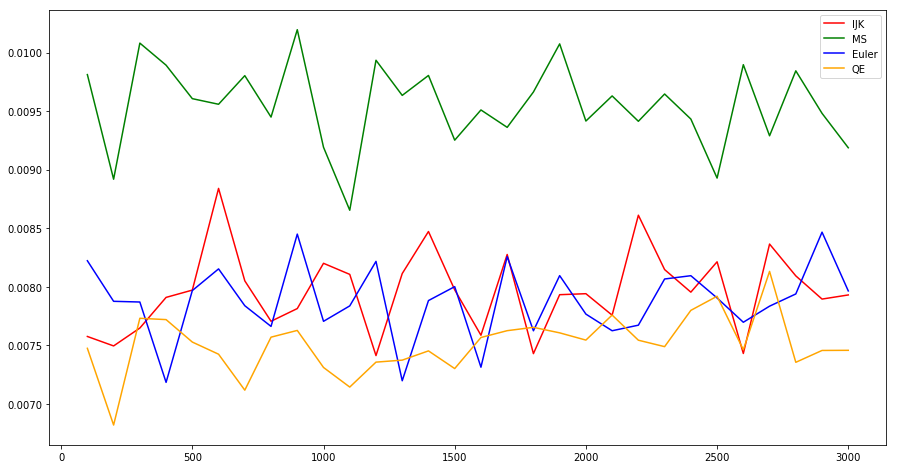

In [161]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,8)

xaxis = range(100,3001,100)
plt.plot(xaxis,errorListIJKm,label="IJK",color = "red")
plt.plot(xaxis,errorListMSm,label="MS", color = "green")
plt.plot(xaxis,errorListESm,label="Euler",color = "blue")
plt.plot(xaxis,errorListQEm,label="QE",color = "orange")
plt.legend()
plt.show()

Choosing M = 260 #number of working days in a year #observing stock price end at every day

choosing N = 2500 #number of the simulation path taken in monte carlo

In [31]:
def RMSE(price, priceAct, n):
    pValue = scipy.stats.mstats.normaltest(price)[1]
    low,high = np.mean(price) + 2.58*(np.std(price)/sqrt(n)),np.mean(price) - 2.58*(np.std(price)/sqrt(n))
    interval = 2*2.58*(np.std(price)/sqrt(n))
    diffVar = []
    diff = []
    for i in range(0,30):
        diff.append(price[i]-priceAct)
        diffVar.append((price[i]-np.mean(price))**2)
    
    var = np.mean(diffVar)
    bias = np.mean(diff)
    rmse  = sqrt(bias**2 + var)
    print("The P-value of the Normality test is ", pValue)
    print("The width of the interval is", interval)
    print("The values range from ", low , "to ", high)
    print("The RMSE is ",rmse)
    return pValue,interval,low,high,rmse

In [119]:
priceES = []
priceMS = []
priceIJK = []
priceQE =[]

for i in range(1,31,1):
    priceES.append(EulerScheme(260,2500)[0])
    priceMS.append(MilsteinScheme(260,2500)[0])
    priceIJK.append(IJKScheme(260,2500)[0])
    priceQE.append(QEScheme(260,2500)[0])
    

In [121]:
RMSE(priceES,25.72186,30)

The P-value of the Normality test is  0.105621378617
The width of the interval is 0.0142335384636
The values range from  24.97124907 to  24.9570155315
The RMSE is  0.7578783118291165


(0.10562137861710937,
 0.014233538463640252,
 24.971249069997587,
 24.957015531533944,
 0.7578783118291165)

In [122]:
RMSE(priceMS,25.72186,30)

The P-value of the Normality test is  0.996244530008
The width of the interval is 0.0170353271788
The values range from  24.963331596 to  24.9462962688
The RMSE is  0.7672591811506635


(0.99624453000788005,
 0.017035327178757831,
 24.963331595976545,
 24.946296268797784,
 0.7672591811506635)

In [123]:
RMSE(priceIJK,25.72186,30)

The P-value of the Normality test is  0.788516907164
The width of the interval is 0.0122258120275
The values range from  24.9696457103 to  24.9574198982
The RMSE is  0.7584382304891887


(0.78851690716352074,
 0.012225812027489603,
 24.969645710259261,
 24.957419898231773,
 0.7584382304891887)

In [124]:
RMSE(priceQE,25.72186,30)

The P-value of the Normality test is  0.404155451711
The width of the interval is 0.0142294518403
The values range from  24.9578617215 to  24.9436322697
The RMSE is  0.771260918117173


(0.4041554517113094,
 0.014229451840253413,
 24.957861721542795,
 24.943632269702544,
 0.771260918117173)

### Dont execute beyond this

In [34]:
import random
N = 260 # discretisation density
errorListQE = []
index = []

for i in range(10000,100001,10000):
    index.append(i)
    errorListQE.append(QEScheme(i,N)[1])
    

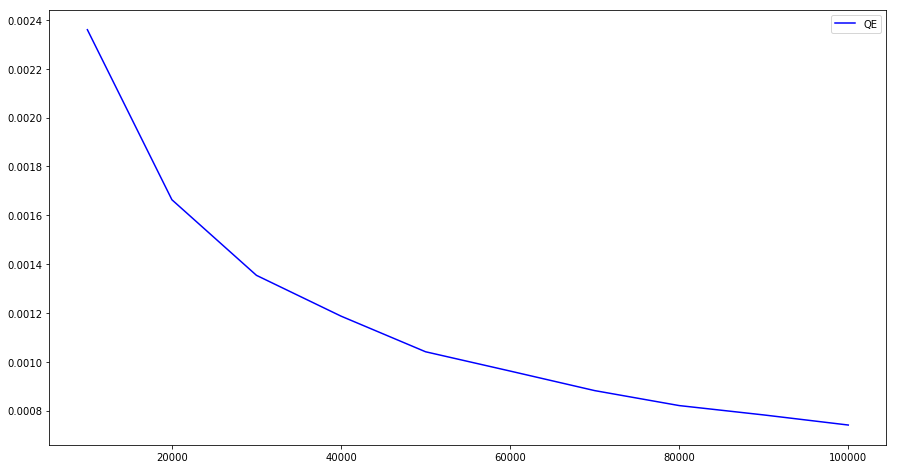

In [35]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,8)

xaxis = range(10000,100001,10000)
plt.plot(xaxis,errorListQE,label="QE",color = "blue")
plt.legend()
plt.show()

In [37]:
QEScheme(100000,260)

(24.956190080788783, 0.00074181702323148865)

### Double No Touch Option

In [92]:
def QEdnt(M,N,s0):
    r = 0
    K = 100
    T =1 
    dt = T/N
    row =0.36
    kappa = 2.58
    eta = 0.043
    v0 = 0.114
    sigma = 1
    psic = 1.5
    z1 = 0.5
    z2 = 0.5
    L = 50
    U = 150
    
    c=[]

    for j in range(1,M):
        v =[]
        v.append(v0)
        s =[]
        s.append(s0)
        for i in range(1,N):
            x=random.gauss(0,1)
            y=random.uniform(0,1)
            z=random.gauss(0,1)
            expo = math.exp(-kappa*dt)
            randomTerm = row*x+sqrt(1-row**2)*y
            m = eta + (v[i-1] - eta)*expo
            ssq = (v[i-1]*sigma*sigma*expo*(1-expo)/kappa) + (eta*sigma*sigma*0.5/kappa*((1-expo)**2))
            psi = ssq/(m**2)
            if psi <= psic:
                bsq = max(2/psi -1 +2*math.sqrt(2/psi)*math.sqrt(2/psi - 1),0)
                a = m/(1+bsq)
                b = math.sqrt(bsq)
                v.append(a*(b + x)**2)
            else:
                p = (psi -1)/(psi+1)
                beta = max((1-p)/m,0)
                if y<p:
                    v.append(0)
                else:
                    v.append(math.log10((1-p)/(1-y))/beta)
                    
            k0 = -row*kappa*eta*dt/sigma
            k1 = z1*dt*(kappa*row/sigma - 0.5 ) - row/sigma
            k2 = z2*dt*(kappa*row/sigma - 0.5 ) + row/sigma
            k3 = z1*dt*(1-row**2)
            k4 = z2*dt*(1-row**2)
            s.append(s[i-1] + r*dt + k0 + k1*v[i-1]+ k2*v[i] + math.sqrt(k3*v[i-1]+k4*v[i])*z )
            
            if s[i] < L or s[i] > U:
                payoff = 0
                break
            else:
                payoff = 1
                
        if payoff == 1:
            payoff = max(s[N-1]-K,0)
            
        c.append(math.exp(-r*T)*payoff)
    
    price = (np.mean(c))
    error = (np.std(c)/math.sqrt(M))
    return price,error

In [95]:
QEdnt(1000,260,125)

(24.953653142412801, 0.0074217859742267958)

### Final Results

In [76]:
def IJKSchemeS(M,N,s0):
    r = 0
    K = 100
    T =1 
    dt = T/N
    row =0.36
    kappa = 2.58
    eta = 0.043
    v0 = 0.114
    sigma = 1
    
    c=[]

    for j in range(1,M):
        v =[]
        v.append(v0)
        s =[]
        s.append(s0)
        for i in range(1,N):
            x=random.gauss(0,1)
            y=random.gauss(0,1)
            randomTerm = row*x+sqrt(1-row**2)*y
            vtemp = max(v[i-1],0)
            firstTerm = kappa*eta*dt
            secondTerm = sigma*sqrt(vtemp*dt)*randomTerm
            thirdTerm = 0.25*sigma*sigma*dt*(randomTerm**2 -1)
            v.append((v[i-1]+firstTerm + secondTerm + thirdTerm)/(1+kappa*dt))
            sFirstTerm = (r - 0.25*(vtemp+max(v[i],0)))*dt
            sSecondTerm = row*sqrt(vtemp*dt)*randomTerm
            sThirdTerm = 0.5*(sqrt(max(v[i],0)) + sqrt(vtemp))*(x - row*randomTerm)*sqrt(dt)
            sFourthTerm = sigma*row*0.25*dt*(randomTerm**2 - 1)
            s.append(s[i-1] + sFirstTerm + sSecondTerm + sThirdTerm + sFourthTerm)
        
        c.append(math.exp(-r*T)*max(s[N-1]-K,0))
    
    price = (np.mean(c))
    error = (np.std(c)/math.sqrt(M))
    return price,error


In [77]:
def MilsteinSchemeS(M,N,s0):
    r = 0
    K = 100
    T =1 
    dt = T/N
    row =0.36
    kappa = 2.58
    eta = 0.043
    v0 = 0.114
    sigma = 1

    c=[]

    for j in range(1,M):
        v=[]
        v.append(v0)
        s=[]
        s.append(s0)

        for i in range(1,N):
            x=random.gauss(0,1)
            y=random.gauss(0,1)
            randomTerm = row*x + math.sqrt(1-row**2)*y
            vtemp = max(0,v[i-1])
            firstTerm = kappa*(eta - vtemp*0.5)*dt
            thirdTerm = 0.25*(sigma**2)*dt*(randomTerm**2 - 1)
            secondTerm = sigma*((dt*vtemp)**0.5)*randomTerm
            v.append(v[i-1]+ firstTerm + secondTerm + thirdTerm)
            s.append(s[i-1] + math.sqrt(vtemp*dt)*x + (r-vtemp*0.5)*dt)
        
        c.append(math.exp(-r*T)*max(s[N-1]-K,0))
    
    price = np.mean(c)       
    error = np.std(c)/math.sqrt(M)
    return price,error

In [78]:
def EulerSchemeS(M,N,s0):
    r = 0
    K = 100
    T =1 
    dt = T/N
    row =0.36
    kappa = 2.58
    eta = 0.043
    v0 = 0.114
    sigma = 1
    
    c=[]

    for j in range(1,M):
        v =[]
        v.append(v0)
        s =[]
        s.append(s0)
        for i in range(1,N):
            x=random.gauss(0,1)
            y=random.gauss(0,1)
            firstTerm = kappa*(eta - max(0,v[i-1]))*(dt)
            secondTerm = sigma*(max(0,v[i-1]) *dt)**0.5
            randomTerm = row*x+math.sqrt(1-row**2)*y
            v.append(v[i-1] + firstTerm + (secondTerm * randomTerm))
            s.append(s[i-1] + math.sqrt(max(v[i-1],0)*dt)*x + (r - max(v[i-1],0)*0.5)*dt)
        
        c.append(math.exp(-r*T)*max(s[N-1]-K,0))
        
        
    price = np.mean(c)
    error = np.std(c)/math.sqrt(M)
    return price,error

In [79]:
def QESchemeS(M,N,s0):
    r = 0
    K = 100
    T =1 
    dt = T/N
    row =0.36
    kappa = 2.58
    eta = 0.043
    v0 = 0.114
    sigma = 1
    psic = 1.5
    z1 = 0.5
    z2 = 0.5
    
    c=[]

    for j in range(1,M):
        v =[]
        v.append(v0)
        s =[]
        s.append(s0)
        for i in range(1,N):
            x=random.gauss(0,1)
            y=random.uniform(0,1)
            z=random.gauss(0,1)
            expo = math.exp(-kappa*dt)
            randomTerm = row*x+sqrt(1-row**2)*y
            m = eta + (v[i-1] - eta)*expo
            ssq = (v[i-1]*sigma*sigma*expo*(1-expo)/kappa) + (eta*sigma*sigma*0.5/kappa*((1-expo)**2))
            psi = ssq/(m**2)
            if psi <= psic:
                bsq = max(2/psi -1 +2*math.sqrt(2/psi)*math.sqrt(2/psi - 1),0)
                a = m/(1+bsq)
                b = math.sqrt(bsq)
                v.append(a*(b + x)**2)
            else:
                p = (psi -1)/(psi+1)
                beta = max((1-p)/m,0)
                if y<p:
                    v.append(0)
                else:
                    v.append(math.log10((1-p)/(1-y))/beta)
                    
            k0 = -row*kappa*eta*dt/sigma
            k1 = z1*dt*(kappa*row/sigma - 0.5 ) - row/sigma
            k2 = z2*dt*(kappa*row/sigma - 0.5 ) + row/sigma
            k3 = z1*dt*(1-row**2)
            k4 = z2*dt*(1-row**2)
            s.append(s[i-1] + r*dt + k0 + k1*v[i-1]+ k2*v[i] + math.sqrt(k3*v[i-1]+k4*v[i])*z )
        
        c.append(math.exp(-r*T)*max(s[N-1]-K,0))
    
    price = (np.mean(c))
    error = (np.std(c)/math.sqrt(M))
    return price,error

In [86]:
print(QESchemeS(20000,260,125))
print(EulerSchemeS(20000,260,125))
print(MilsteinSchemeS(20000,260,125))
print(IJKSchemeS(20000,260,125))

(24.956807825789792, 0.0016595738724769376)
(24.967032089167699, 0.0017711789354110598)
(24.95040245011673, 0.0021441166078509954)
(24.968663016849742, 0.0017778933776659643)


In [125]:
print(QESchemeS(20000,260,100))
print(EulerSchemeS(20000,260,100))
print(MilsteinSchemeS(20000,260,100))
print(IJKSchemeS(20000,260,100))

(0.063764940950343019, 0.00099997889625222185)
(0.075043813347719326, 0.0011059103617021655)
(0.08407618914742683, 0.0013064719302600739)
(0.075361221883061033, 0.0011056649793601615)


In [126]:
print(QESchemeS(20000,260,75))
print(EulerSchemeS(20000,260,75))
print(MilsteinSchemeS(20000,260,75))
print(IJKSchemeS(20000,260,75))

(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)


### Check for negative values

In [137]:
def QESchemePut(M,N):
    r = 0
    K = 100
    T =1 
    dt = T/N
    row =0.36
    kappa = 2.58
    eta = 0.043
    v0 = 0.114
    s0 = 100
    sigma = 1
    psic = 1.5
    z1 = 0.5
    z2 = 0.5
    
    c=[]

    for j in range(1,M):
        v =[]
        v.append(v0)
        s =[]
        s.append(s0)
        for i in range(1,N):
            x=random.gauss(0,1)
            y=random.uniform(0,1)
            z=random.gauss(0,1)
            expo = math.exp(-kappa*dt)
            randomTerm = row*x+sqrt(1-row**2)*y
            m = eta + (v[i-1] - eta)*expo
            ssq = (v[i-1]*sigma*sigma*expo*(1-expo)/kappa) + (eta*sigma*sigma*0.5/kappa*((1-expo)**2))
            psi = ssq/(m**2)
            if psi <= psic:
                bsq = max(2/psi -1 +2*math.sqrt(2/psi)*math.sqrt(2/psi - 1),0)
                a = m/(1+bsq)
                b = math.sqrt(bsq)
                v.append(a*(b + x)**2)
            else:
                p = (psi -1)/(psi+1)
                beta = max((1-p)/m,0)
                if y<p:
                    v.append(0)
                else:
                    v.append(math.log10((1-p)/(1-y))/beta)
                    
            k0 = -row*kappa*eta*dt/sigma
            k1 = z1*dt*(kappa*row/sigma - 0.5 ) - row/sigma
            k2 = z2*dt*(kappa*row/sigma - 0.5 ) + row/sigma
            k3 = z1*dt*(1-row**2)
            k4 = z2*dt*(1-row**2)
            s.append(s[i-1] + r*dt + k0 + k1*v[i-1]+ k2*v[i] + math.sqrt(k3*v[i-1]+k4*v[i])*z )
        
        c.append(math.exp(-r*T)*max(s[N-1]-k,0))
    
    
    price = (np.mean(c))
    error = (np.std(c)/math.sqrt(M))
    return price,error

In [138]:
QESchemePut(3000,260)

(0.06712970355178878, 0.0025076812627612753)